- 어떤 규칙을 하나의 트리 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 알고리즘
- 딥려닝 기반을 제외한 전통적인 통계기반의 머신러닝 모델중 직관적이고 실용성이 높음
 - 그러나, 설명력(예측력)이 떨어진다는 단점이 있음
- scikit-learn의 tree서브모듈에 DecisionTreeClassifier( ) // Regression

# 로지스틱 회귀로 와인 분류하기_화이트와인

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
wine = pd.read_csv('http://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [5]:
wine.head()
# class 0.0(레드), 1(화이트) 두개가 있겠군

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
wine.shape

(6497, 4)

In [7]:
# csv파일은 info먼저 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
# 숫자인 데이터는 기초통계량도 확인
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
wine['class'].unique()

array([0., 1.])

In [13]:
wine['class'].value_counts() # 개별건수

1.0    4898
0.0    1599
Name: class, dtype: int64

In [14]:
wine_input = wine[['alcohol', 'sugar','pH']].to_numpy()
wine_target = wine['class'].to_numpy() # 머신 돌리려구

In [15]:
wine_input.shape, wine_target.shape

((6497, 3), (6497,))

## 훈련 세트와 테스트 세트로 분리

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
wine_input, wine_target, test_size = 0.2, random_state=42)

In [17]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

## 피처 스케일링
- 피처당 차이가 크지 않을 떄는 minmax 사용도 괜춘 

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀모델 구축하기

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
## 과소 적합 의심
### 해결하려면 규제를 주는 것도 좋음 (C값 변경, 또는 피처를 특성공학을 통해 확장시키거나)

0.7808350971714451
0.7776923076923077


In [22]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [25]:
lr.predict(train_scaled[:5])

array([1., 1., 1., 1., 1.])

In [24]:
lr.classes_

array([0., 1.])

In [23]:
# 시그모이드 함수를 거처 0~1 
lr.predict_proba(train_scaled[:5])  # 예측 확률을 알아보기위한 값이고

array([[0.06189333, 0.93810667],
       [0.21742616, 0.78257384],
       [0.40703571, 0.59296429],
       [0.45226659, 0.54773341],
       [0.00530794, 0.99469206]])

In [28]:
# z 값 출력함수
decisions = lr.decision_function(train_scaled[:5])
decisions

array([2.71845124, 1.28072898, 0.37623326, 0.19151687, 5.23322944])

In [29]:
from scipy.special import expit
expit(decisions) 

array([0.93810667, 0.78257384, 0.59296429, 0.54773341, 0.99469206])

In [ ]:
# 여기서 끝... ?ㅋ
# 수치형(연속형: 실수- 예측,이산형-분류, 회귀 ) / 비수치형- 분류, 회귀
# 피처가 많을떄 타깃과의 인과관계(상관계수)를 파악하여 그 피처들을 데리고

# 의사결정나무(Decision Tree)

In [30]:
from sklearn.tree import DecisionTreeClassifier # 이진분류
# 한번 나무 만들면 가지도 치고 분류도 해야하니 시드값
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 로지스틱 모델보다 훨씩 결정력이 높은 것을 알수 있으나 과대적합이 의심되어서 가지칠거야.

0.996921300750433
0.8592307692307692


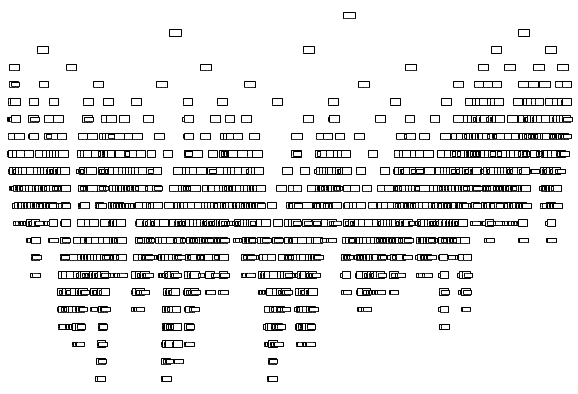

In [31]:
# dt시각화
## 사이킷런에서의 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

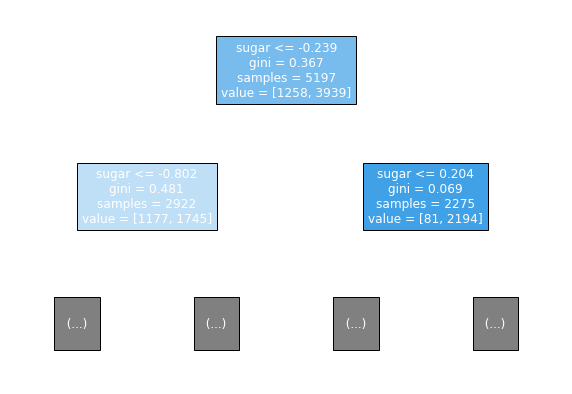

In [44]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, 
          feature_names = ['alcohol', 'sugar','pH'])
# 가지 치기, max_depth (루트를 뺀 깊이)
plt.show()
# 분류지만 확률이 보이니깐 회귀도 사양할 수 있겠군.. 

In [38]:
# 진위 불순도는 1 - (음성클래스의 비율 ^2 + 양성클래스의 비율^2)
1-((1258/5197)**2 + (3939/5197)**2)
# 나무에서 진위가 판단 요건이 되는겨 

0.3669367279393918

In [43]:
# 정보획득이라는 것은 이전 불순도를 보았을떄 (0.367)다음 불순도의 합을 뺴면(0.481-0.069)
0.367 - (0.481+0.069)
# 불순도가 작을수록 정보양(정보획득)은 증가함 정보이득은(부모노드와 자식간의 차)

-0.18300000000000005

## 가지치기(pruning)
- 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것.
- 과대적합을 막기 위해 사용된다.
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대개수, 한 노드가 분할하기 위한 최소 데이터 수를 제한한다.

In [45]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) 
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
## 훈련데이터와 테스트세트 사이의 차가 많이 줄어든것을 확인할 수 있다.
## 그러나 성능이 좋은 모델은 아니다.

0.8454877814123533
0.8415384615384616


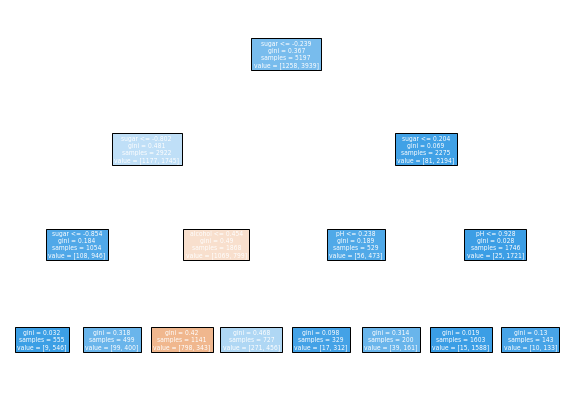

In [48]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True, feature_names = ['alcohol', 'sugar','pH'])
plt.show()

In [51]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) 
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 의사결정나무는 전처리 없이 사용한다.

0.8454877814123533
0.8415384615384616


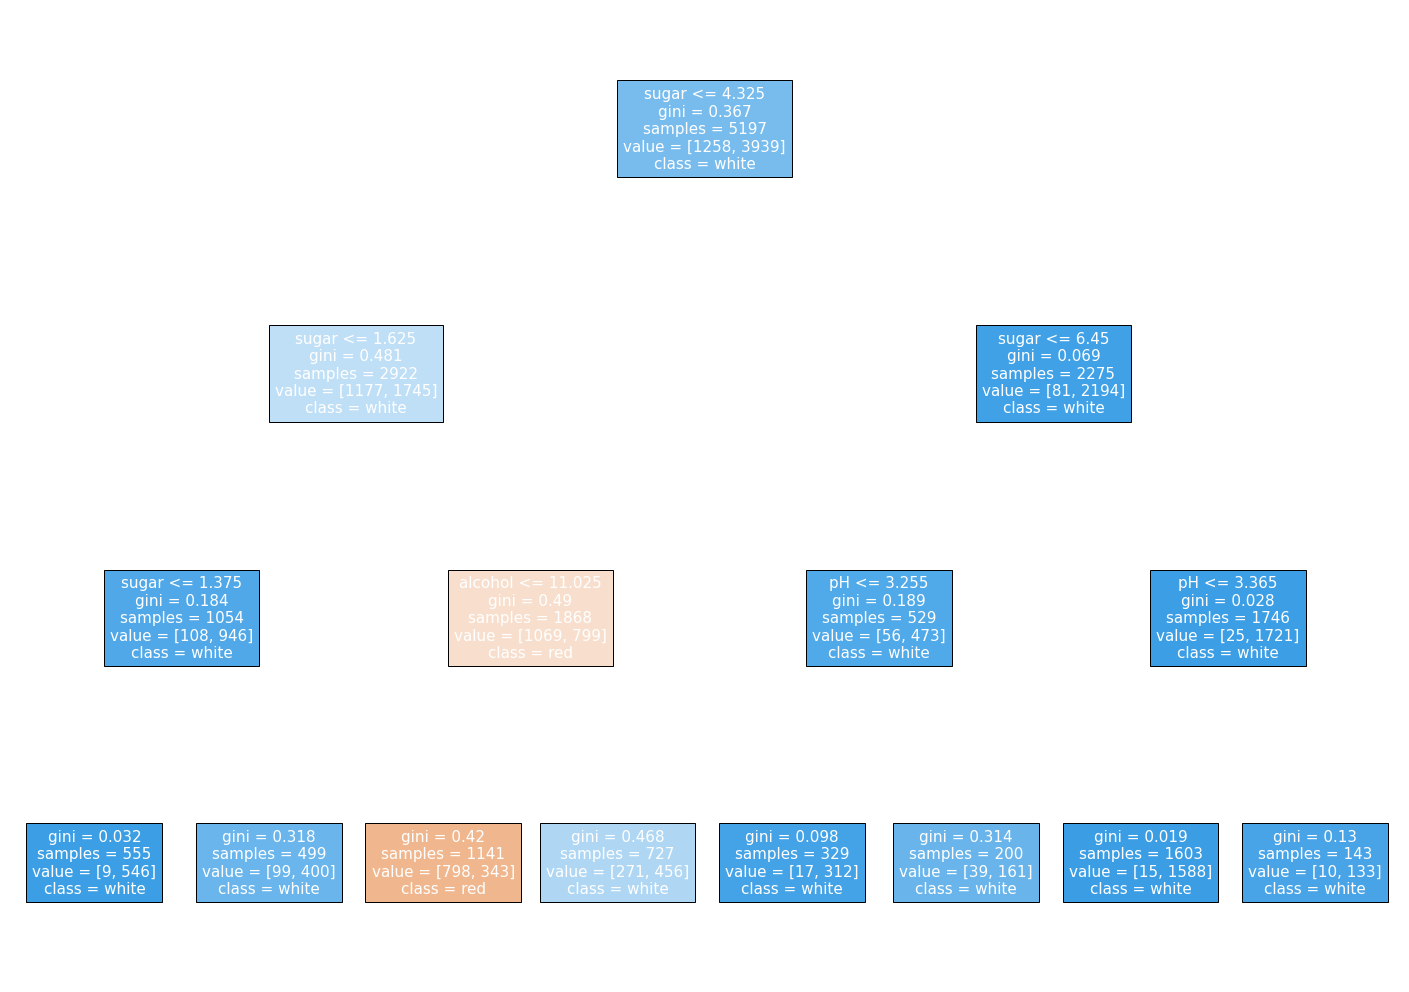

In [63]:
plt.figure(figsize=(25,18))
plot_tree(dt,filled=True, feature_names = ['alcohol', 'sugar','pH'],class_names=['red', 'white'])
plt.show()
# 특성에 따라 색이 달라짐. 살구색이 (레드와인)
# 1번 규칙으로 온것이 가장 많이 분류할 수 있는 값인데, 결정트리 구성중 어떤 피쳐가 가장 중요한 영향을 미칠까
# 결정트리 처럼 당도가 가장 큰 영향을 미칠까??? 이부분을 계산하는 것이 특성 중요도 (어떤특성이 가장중요한지)

In [55]:
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다
dt.feature_importances_ # fitting 후 생성
# 알콜, 슈가, pH

# 화이트 와인을 완벽히 분류하지 않았음.. 정확성이 높지 않다.

array([0.12345626, 0.86862934, 0.0079144 ])

In [56]:
n_features = wine.data.shape[1]  # 컬럼이니깐 그부분 생각해서 수정하면 될듯
plt.barh(np.arange(n_features), dt.feature_importances_, alingn='center')
plt.yticks(np.arange(n_features), wine.featur_names)
plt.ylim(-1, n_features)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data'

In [57]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [60]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [61]:
wine.shape

(6497, 4)